In [73]:
# Loading Data

%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import random


# using the SQLite Table to read data.
con = sqlite3.connect('final.sqlite') 



#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
cleaned_data = pd.read_sql_query("""
SELECT *
FROM Reviews
""", con) 
#select a random 150 rows 

data_pos = cleaned_data[cleaned_data["Score"]=='positive'].sample(n = 5000,replace=True)
data_neg = cleaned_data[cleaned_data["Score"]=='negative'].sample(n = 5000, replace=True)
final_data = pd.concat([data_pos, data_neg])
cleaned_data['Score'].value_counts()

positive    38479
negative     7592
Name: Score, dtype: int64

In [74]:
# Sorting data based on time
# convert time into understnad time
final_data['Time'] = pd.to_datetime(final_data['Time'], unit = 's')
final_data

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
8473,32469,35339,B000GW46D4,A2ZSK8NC6PX0ZY,"Donald G. Dassel ""Donald347""",3,3,positive,2009-12-06,Excellent Protein Quatity,I find the Jack Links Teriyaki Beef Steaks exc...,b'find jack link teriyaki beef steak excel tas...
16748,45229,49203,B0015UX574,A1W31VOK4DT8P0,MattK,0,0,positive,2012-05-31,Gustaf's wine gums,Gustaf's wine gums are very good. Maynards win...,b'gustaf wine gum good maynard wine gum choic ...
12516,2630,2867,B000PSFKE8,AN5GCKW0I6028,"Melissa ""Ringbearer""",2,2,positive,2011-12-31,My Sheltie Adores Them!,These are a great snack for any dog who has fo...,b'great snack dog food allergi chicken pound s...
31030,42460,46197,B002ZF5QZC,A3D165TX35GR0,S. Macnicoll,2,2,positive,2010-08-02,Good bones at a good price,You get LOTS of bones at a very good price. Yo...,b'get lot bone good price cant beat supermarke...
10858,37514,40749,B000LKYYBU,A1DSI0B2N07GKI,"Arius Cayne ""Arius Cayne""",1,1,positive,2011-09-02,"Hot Damn, This Is GREAT!",I pondered buying this product for days becaus...,b'ponder buy product day mix review mani conce...
25834,43878,47755,B001SAU16Y,A18ZEMA7Y1HPMN,Hope Fairy,0,0,positive,2010-05-11,Delicious!,This stuff is so delicious! It is hard to beli...,b'stuff delici hard believ sugar free would re...
43576,30727,33477,B006N3I84I,A1JFJ36XNBA4C0,Maxell,0,0,positive,2010-09-28,Excellent taste,We have a lot of different flavors at my offic...,b'lot differ flavor offic lucki tri purchas ho...
27810,20640,22550,B002BCE9JS,AMRCPHH1DOSLH,B. Boley,0,0,positive,2011-09-21,A delicious quick meal,I enjoyed this soup. Yes we would all like fre...,b'enjoy soup yes would like fresh pho soup are...
6067,39032,42377,B000F0FX52,A365IPND6FFKQR,big bob,2,2,positive,2011-08-14,would recommend,"three main complaints, otherwise happy. The pl...",b'three main complaint otherwis happi plastic ...
17820,7450,8134,B0019GVYR2,A2YUBHRV4DBRLF,big fan,2,2,positive,2011-10-27,"fast shipping, great price.","I got this product for consumption, I took som...",b'got product consumpt took store bought bake ...


In [75]:
final_data = final_data.sort_values(by='Time')

In [85]:
 #Fuction to compute k value
    
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import KFold
from statistics import mean
def k_classifier_brute(X_train, y_train):
    
    # creating odd list of K for KNN
    myList = list(range(0,50))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for k in neighbors:
        kf = KFold(n_splits=10)
        kf.get_n_splits(X_train)
        acc1 = 0
        for train_index, test_index in kf.split(X_train):
            Xfold_train, Xfold_test = X_train[train_index], X_train[test_index]
            yfold_train, yfold_test = y_train[train_index], y_train[test_index]
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(Xfold_train, yfold_train)
            pred = knn.predict(Xfold_test)
            acc1 += accuracy_score(yfold_test, pred, normalize=True)
            
        average = acc1/10

        cv_scores.append(average)


    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)

    # plot misclassification error vs k 
    plt.plot(neighbors, MSE)

    for xy in zip(neighbors, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs K")
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    return optimal_k

In [86]:
X = final_data['CleanedText']
print('shape of X:', X.shape)

shape of X: (10000,)


In [87]:
# class label
y = final_data["Score"]
print('shape of y:', y.shape)


shape of y: (10000,)


In [88]:
# split data into train and test where 70% data used to train model and 30% for test
# final_data[:int(len(final_data) * 0.75)], final_data[int(len(final_data) * 0.75):]
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape)
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)

(7000,) (7000,) (3000,)


In [89]:
# Train Vectorizor
from sklearn.feature_extraction.text import CountVectorizer 

bow = CountVectorizer()
X_train = bow.fit_transform(X_train)
X_train



<7000x10438 sparse matrix of type '<class 'numpy.int64'>'
	with 230426 stored elements in Compressed Sparse Row format>

In [90]:
# Test Vectorizor

x_test = bow.transform(x_test)
x_test




<3000x10438 sparse matrix of type '<class 'numpy.int64'>'
	with 96121 stored elements in Compressed Sparse Row format>

In [91]:
x_test.shape

(3000, 10438)


The optimal number of neighbors is 29.


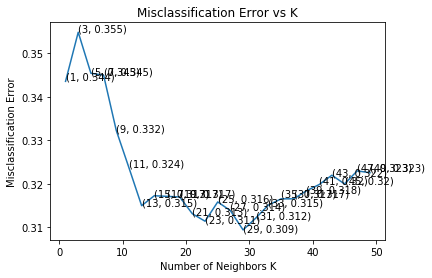

the misclassification error for each k value is :  [0.344 0.355 0.345 0.345 0.332 0.324 0.315 0.317 0.317 0.317 0.313 0.311
 0.316 0.314 0.309 0.312 0.315 0.317 0.317 0.318 0.32  0.322 0.32  0.323
 0.323]


29

In [92]:
 #To choose optimal_k using brute force algorithm

optimal_k_bow = k_classifier_brute(X_train, y_train)
optimal_k_bow

In [93]:
X_train.shape

(7000, 10438)

In [94]:
x_test = np.nan_to_num(x_test)

In [95]:
x_test.shape

(3000, 10438)

In [96]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_bow)

# fitting the model
knn_optimal.fit(X_train, y_train)
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = knn_optimal.predict(x_test)

In [97]:
# Accuracy on train data
train_acc_bow = knn_optimal.score(X_train, y_train)
print("Train accuracy", train_acc_bow)

Train accuracy 0.736


In [98]:
# Error on train data
train_err_bow = 1-train_acc_bow
print("Train Error %f%%" % (train_err_bow))

Train Error 0.264000%


In [99]:
# evaluate accuracy on test data
acc_bow = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_bow, acc_bow))


The accuracy of the knn classifier for k = 29 is 67.400000%


In [ ]:
# Observation - This model is not good for classifaction with KNN
# Train and test accuracy is not more for classification 

In [100]:
# TF-IDF
X = final_data["CleanedText"]

In [101]:
# Target/class-label
y = final_data["Score"]

In [102]:
# Split data
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7000,) (3000,) (7000,) (3000,)


In [103]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer()
#tfidf_data = tfidf.fit_transform(final_4000["CleanedText"])
#tfidf_data
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
X_train = tf_idf_vect.fit_transform(X_train)
X_train

<7000x165454 sparse matrix of type '<class 'numpy.float64'>'
	with 500845 stored elements in Compressed Sparse Row format>

In [105]:
# Convert test text data to its vectorizor
x_test = tf_idf_vect.transform(x_test)
x_test.shape

(3000, 165454)


The optimal number of neighbors is 47.


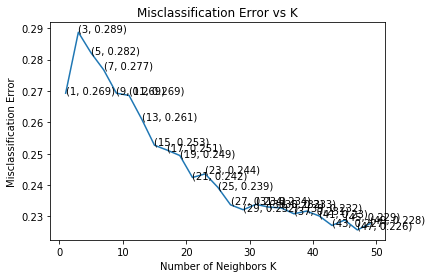

the misclassification error for each k value is :  [0.269 0.289 0.282 0.277 0.269 0.269 0.261 0.253 0.251 0.249 0.242 0.244
 0.239 0.234 0.232 0.234 0.233 0.233 0.231 0.232 0.23  0.227 0.229 0.226
 0.228]


47

In [106]:
#To choosing optimal_k

optimal_k_tfidf = k_classifier_brute(X_train, y_train)
optimal_k_tfidf

In [107]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_tfidf)

# fitting the model
knn_optimal.fit(X_train, y_train)
#knn_optimal.fit(bow_data, y_train)
    
# predict the response
pred = knn_optimal.predict(x_test)

In [108]:
# Accuracy on train data
train_acc_tfidf = knn_optimal.score(X_train, y_train)
print("Train accuracy", train_acc_tfidf)

Train accuracy 0.799


In [109]:
# Error on train data
train_err_tfidf = 1-train_acc_tfidf
print("Train Error %f%%" % (train_err_tfidf))

Train Error 0.201000%


In [110]:
# evaluate accuracy
acc_tfidf = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_tfidf, acc_tfidf))


The accuracy of the knn classifier for k = 47 is 75.900000%


In [134]:
# This model is good compare to the BOW model 
# But it also give a large error in training data set but useen data accuracy is good compare to the last model

In [135]:
# W2V

In [136]:
import gensim


In [137]:
X = final_data["Text"]
X.shape

(10000,)

In [138]:
y = final_data["Score"]

In [139]:
y.shape

(10000,)

In [140]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7000,) (3000,) (7000,) (3000,)


In [141]:
import re

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [142]:
# Train your own Word2Vec model using your own train text corpus
import gensim
list_of_sent=[]
#for sent in final_40k['Text'].values:
for sent in X_train:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [143]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [144]:
w2v_model.wv.most_similar('like')

/usr/local/anaconda/lib/python3.7/site-packages/gensim-3.6.0-py3.7-linux-x86_64.egg/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('think', 0.7485138177871704),
 ('prefer', 0.7427094578742981),
 ('weird', 0.7045055031776428),
 ('enjoy', 0.6955498456954956),
 ('smell', 0.6806859970092773),
 ('artificial', 0.6731626987457275),
 ('assume', 0.6668484210968018),
 ('awful', 0.6641323566436768),
 ('notice', 0.6628615856170654),
 ('really', 0.6535105109214783)]

In [145]:
w2v = w2v_model[w2v_model.wv.vocab]

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [146]:
w2v.shape

(5310, 50)

In [147]:
# Train your own Word2Vec model using your own test text corpus
import gensim
list_of_sent_test = []
#for sent in final_40k['Text'].values:
for sent in x_test:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_test.append(filtered_sentence)

In [148]:
w2v_model=gensim.models.Word2Vec(list_of_sent_test, min_count=5, size=50, workers=4)

In [149]:
w2v_model.wv.most_similar('like')

[('taste', 0.9477003812789917),
 ('really', 0.9293665885925293),
 ('but', 0.9205743074417114),
 ('bad', 0.9187256693840027),
 ('much', 0.9122692942619324),
 ('too', 0.9115270376205444),
 ('just', 0.9037497043609619),
 ('way', 0.8984776735305786),
 ('its', 0.8974325656890869),
 ('sweet', 0.8929460048675537)]

In [150]:
w2v = w2v_model[w2v_model.wv.vocab]

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [151]:
w2v.shape

(3309, 50)

In [152]:
# Average Word2Vec
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))
sent_vectors= np.nan_to_num(sent_vectors)

7000
50


In [153]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_test: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))
sent_vectors_test = np.nan_to_num(sent_vectors_test)

3000
50


In [154]:
X_train = sent_vectors
y_train = np.nan_to_num(y_train)

In [155]:
x_test = sent_vectors_test


The optimal number of neighbors is 1.


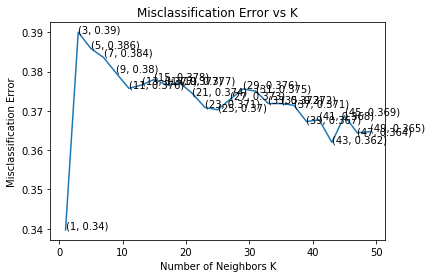

the misclassification error for each k value is :  [0.34  0.39  0.386 0.384 0.38  0.376 0.377 0.378 0.377 0.377 0.374 0.371
 0.37  0.373 0.376 0.375 0.372 0.372 0.371 0.367 0.368 0.362 0.369 0.364
 0.365]


1

In [156]:
optimal_k_avgw2v = k_classifier_brute(X_train, y_train)
optimal_k_avgw2v

In [157]:
y_test = np.nan_to_num(y_test)

In [158]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_avgw2v)

# fitting the model
knn_optimal.fit(X_train, y_train)
#knn_optimal.fit(bow_data, y_train)
    
# predict the response
pred = knn_optimal.predict(x_test)

In [159]:
# Accuracy on train data
train_acc_avgw2v = knn_optimal.score(X_train, y_train)
print("Train accuracy", train_acc_avgw2v)


Train accuracy 1.0


In [160]:
# Error on train data
train_err_avgw2v = 1-train_acc_avgw2v
print("Train Error %f%%" % (train_err_avgw2v))


Train Error 0.000000%


In [161]:
# evaluate accuracy
acc_avg_w2v = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_avgw2v, acc_avg_w2v))


The accuracy of the knn classifier for k = 1 is 66.433333%


In [162]:
print("Test Error %f%%" %-(100-(acc_avg_w2v)))

Test Error -33.566667%


In [163]:
#TF-IDFweighted Word2Vec
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1  

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [164]:
len(tfidf_sent_vectors)

7000

In [165]:
X_train = tfidf_sent_vectors

In [166]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent_test: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1  

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [167]:
len(tfidf_sent_vectors_test)

3000

In [168]:
x_test = tfidf_sent_vectors_test

In [169]:
X_train = np.nan_to_num(X_train)

In [170]:
x_test = np.nan_to_num(x_test)


The optimal number of neighbors is 3.


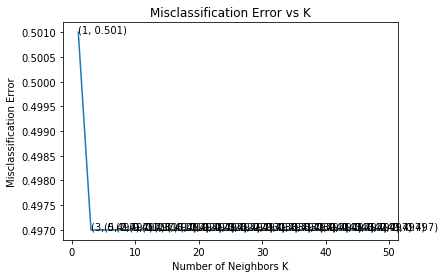

the misclassification error for each k value is :  [0.501 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497
 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497 0.497
 0.497]


3

In [171]:
optimal_k_tfidf_w2v = k_classifier_brute(X_train, y_train)
optimal_k_tfidf_w2v

In [172]:
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k_tfidf_w2v)

# fitting the model
knn_optimal.fit(X_train, y_train)
#knn_optimal.fit(bow_data, y_train)
    
# predict the response
pred = knn_optimal.predict(x_test)

In [173]:
# Accuracy on train data
train_acc_tfidf_w2v = knn_optimal.score(X_train, y_train)
print("Train accuracy", train_acc_tfidf_w2v)

Train accuracy 0.497


In [174]:
# Error on train data
train_err_tfidf_w2v = 1-train_acc_tfidf_w2v
print("Train Error %f%%" % (train_err_tfidf_w2v))

Train Error 0.503000%


In [175]:
# evaluate accuracy
acc_tfidf_w2v = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_tfidf_w2v, acc_tfidf_w2v))


The accuracy of the knn classifier for k = 3 is 50.700000%


In [176]:
print("Test Error %f%%" %-(100-(acc_tfidf_w2v)))

Test Error -49.300000%


In [177]:
'''
Conclusions:
1. KNN is a classifier algorithm but most off time it is not give a best solution 
2. KNN with tfidf model give a best unseen data accuray instead of other models like BOW, W2V, avgW2v etc
3. KNN with avgW2v is also good for training data set but nor testing or useen data set
4. When value of k will be increase then most of time misclassifaction error is decreasing 
'''

'\nConclusions:\n1. KNN is a classifier algorithm but most off time it is not give a best solution \n2. KNN with tfidf model give a best unseen data accuray instead of other models like BOW, W2V, avgW2v etc\n3. KNN with avgW2v is also good for training data set but nor testing or useen data set\n4. When value of k will be increase then most of time misclassifaction error is decreasing \n'